In [1]:
# show the matplotlib plotted graph within notebook lines.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import os
import time
from tqdm import tqdm
import pandas as pd
import numpy as np
import scipy
import scipy.stats as st
import re
import codecs
from collections import Counter
import nltk
from nltk.stem import *
from nltk.corpus import stopwords
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from scipy import stats

In [3]:
# extract data
#!gzip -d -k 20news-19997.tar.gz

#!tar -xf 20news-19997.tar

gzip: 20news-19997.tar already exists;	not overwritten


^C


In [6]:
!ls 20_newsgroups

alt.atheism
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x
misc.forsale
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey
sci.crypt
sci.electronics
sci.med
sci.space
soc.religion.christian
talk.politics.guns
talk.politics.mideast
talk.politics.misc
talk.religion.misc


In [7]:
def getFilesDirectory(datapath='20_newsgroups'):
    # create file directory for all files
    files = []
    for (path, dirnames, filenames) in os.walk(datapath):
        files.extend(os.path.join(path, name) for name in filenames)
    # putting file directories into pandas dataframe
    directorydf= pd.DataFrame(files)
    directorydf.columns = ['Directories']
    return directorydf

In [8]:
directorydf = getFilesDirectory()

In [9]:
def label_target (d):
    if d.find("alt.atheism") > 0 :
      return 0
    if d.find("comp.graphics") > 0:
      return 1
    if d.find("comp.os.ms-windows.misc") > 0:
      return 2
    if d.find("comp.sys.ibm.pc.hardware") > 0:
      return 3
    if d.find("comp.sys.mac.hardware") > 0:
      return 4
    if d.find("comp.windows.x") > 0:
      return 5
    if d.find("misc.forsale") > 0:
      return 6
    if d.find("rec.autos") > 0:
      return 7
    if d.find("rec.motorcycles") > 0:
      return 8
    if d.find("rec.sport.baseball") > 0:
      return 9
    if d.find("rec.sport.hockey") > 0:
      return 10
    if d.find("sci.crypt") > 0:
      return 11
    if d.find("sci.electronics") > 0:
      return 12
    if d.find("sci.med") > 0:
      return 13
    if d.find("sci.space") > 0:
      return 14
    if d.find("soc.religion.christian") > 0:
      return 15
    if d.find("talk.politics.guns") > 0:
      return 16
    if d.find("talk.politics.mideast") > 0:
      return 17
    if d.find("talk.politics.misc") > 0:
      return 18
    if d.find("talk.religion.misc") > 0:
      return 19
    return 'Other'

In [10]:
# putting file directories into pandas dataframw
directorydf.columns = ['Directories']
directorydf.head(n=5)

,Directories
0,20_newsgroups\alt.atheism\49960
1,20_newsgroups\alt.atheism\51060
2,20_newsgroups\alt.atheism\51119
3,20_newsgroups\alt.atheism\51120
4,20_newsgroups\alt.atheism\51121


In [11]:
def dataPreprocessor(k, fs, encode, directorydf, size=None):
    """
    INPUT
        k: int. number of features to use
        fs: string. From ['tf', 'mi']
        encode: string. From ['tf', 'boolean']
        drectorydf: Dataframe. It is given, see above support functions
        size: int. Sample size. Default should be the data size.
    OUTPUT
        data: Dataframe. preprocessed data
    
    ps: 'tf' means term frequency, 'mi' means mutual information
    """
    
    ########### your code goes here ###########
    nltk.download('stopwords')
    from collections import Counter
    import re
    import codecs
    counter = Counter()
    # Open the files and count the word frequency in each file in a loop and update the counter after finished processing a file
    for rownum, row in enumerate(directorydf.itertuples()):
        with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
            counter.update([word.lower() for word in re.findall(r'\w+', myfile.read())if word not in stopwords.words('english')])
        if (rownum % 1000 == 0):
            print("processed %d files" % (rownum+1))
        if (rownum == size):
            break
            
    topk = counter.most_common(k)
            
    np = []
    if encode == 'boolean':
    # now we had top k words, count the frequecy (binary) of these words in individual file
        for rownum, row in enumerate(directorydf.itertuples()):
            with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
                tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
                # if the word appears in the doc, then 1, else 
                topkinDoc = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
                # create a list for top k words with encoded target and its label
                np.append(topkinDoc+[label_target(row.Directories)])
                if (rownum % 1000 == 0):
                    print("processed %d files" % (rownum+1))
                if (rownum == size):
                    break
    else:
        for rownum, row in enumerate(directorydf.itertuples()):
            with codecs.open(row.Directories,"r" ,encoding='utf-8', errors='ignore') as myfile:
                tempCounter = Counter([word for word in re.findall(r'\w+', myfile.read())])
                # if the word appears in the doc, then 1, else 
                topkinDoc = [tempCounter[word] if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
                # create a list for top k words with encoded target and its label
                np.append(topkinDoc+[label_target(row.Directories)])
                if (rownum % 1000 == 0):
                    print("processed %d files" % (rownum+1))
                if (rownum == size):
                    break
            
                
    data = pd.DataFrame(np)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    dfName
    data.columns = dfName+['target']
    ###########         end         ###########
    return data

In [12]:
#Might get back to this function to make it more efficient
data = dataPreprocessor(k=50, fs='tf', encode='tf', directorydf=directorydf, size=2000)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
processed 1 files
processed 1001 files
processed 2001 files
processed 1 files
processed 1001 files
processed 2001 files


In [13]:
data.head()

,edu,i,cmu,com,cs,news,srv,graphics,the,net,...,ans,reston,howland,god,people,cc,posting,this,university,target
0,10,1,5,1,3,4,3,0,63,1,...,0,0,0,3,5,0,0,4,0,0
1,5,0,4,1,3,3,3,0,161,1,...,1,1,1,1,21,0,1,12,0,0
2,7,0,3,3,4,2,2,0,31,1,...,1,1,1,0,1,0,0,2,0,0
3,6,0,4,1,3,1,3,0,9,1,...,1,1,1,0,0,0,0,2,2,0
4,4,0,4,8,3,0,3,0,2,1,...,1,1,1,0,0,0,0,1,0,0


In [14]:
#Confidence Interval Function
import scipy.stats
from math import sqrt
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    mu,sd = np.mean(a),np.std(a)
    z = stats.t.ppf(confidence, n)
    h=z*sd/sqrt(n)
    return mu, h

In [15]:
def randomSplitCI(data, clf, num_run, **params):
    """
    INPUT
        data: 2D numpy array. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        num_run: int. How many times you want to run for random evaluation?
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        train_scores: list. Results of trails
        test_scores: list. Results of trails
        train_mean: scalar. Average accuracy
        test_mean: scalar. Average accuracy
        train_ci: scalar. Confidence Interval
        test_ci: scalar. Confidence Interval
    """
    
    ########### your code goes here ###########
    if clf == 'LR':
        clf = LogisticRegression(C=params["c"])#add if statement to account for SVM and NB
    else:
        clf = GaussianNB()
    #clf.set_params(**params)
    train_scores = []
    test_scores = []
    
    
    for i in range (0,num_run):
        np.random.permutation(data)
        features = data.iloc[:,:data.columns.get_loc("target")-1].as_matrix()
        target = data['target'].as_matrix()
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
        clfModel = clf.fit(features_train, target_train)
        target_pred = clfModel.predict(features_test)
        train_pred = clfModel.predict(features_train)
        #pd.DataFrame(metrics.confusion_matrix(target_test, target_pred), columns=labels, index=labels)
        test_scores.append(metrics.accuracy_score(target_test, target_pred))
        train_scores.append(metrics.accuracy_score(target_train, train_pred))
        #print(test_scores)
    train_mean, train_ci = mean_confidence_interval(train_scores)
    test_mean, test_ci = mean_confidence_interval(test_scores)
    ###########         end         ###########
    return train_scores, test_scores, train_mean, test_mean, train_ci, test_ci

In [16]:
train_scores,test_scores,train_mean,test_mean,train_ci,test_ci = randomSplitCI(data, 'LR', 10, c=1.0)
print("Train\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}\n".format(train_scores, train_mean, train_ci)
    )
print("Test\
    \nResult of trails:{0} \
    \nAverage Accuracy: {1} \
    \nConfidence Interval: {2}".format(test_scores, test_mean, test_ci)
    )

Train    
Result of trails:[1.0, 1.0, 0.99928571428571433, 0.99928571428571433, 1.0, 1.0, 0.99928571428571433, 0.99928571428571433, 1.0, 0.99928571428571433]     
Average Accuracy: 0.9996428571428572     
Confidence Interval: 0.00020469661852098937

Test    
Result of trails:[0.99833610648918469, 0.99833610648918469, 1.0, 1.0, 0.99833610648918469, 0.99833610648918469, 1.0, 1.0, 0.99833610648918469, 1.0]     
Average Accuracy: 0.9991680532445922     
Confidence Interval: 0.00047683072534010604


In [17]:
def randomSplitCM(data, clf, num_run, **params):
    """
    INPUT
        data: Dataframe. Pre-processed data
        clf: string. Name of the classifier from ['LR', 'SVM', 'NB']
        params: string->real. Hyper-parameter of classifier. PS: c=1.0, r=0.01
    
    OUTPUT
        cm: pandas.DataFrame. Confusion Matrix
    """
    
    ########### your code goes here ###########
    if clf == 'LR':
        clf = LogisticRegression(C=params["c"])
    else:
        clf = GaussianNB()
    #clf.set_params(**params)
    cms = {}
    #labels = np.unique(data['label'].apply(lambda x: x.split("\\")[1]))
    for i in range(0,num_run):
        np.random.permutation(data)
        features = data.iloc[:,:data.columns.get_loc("target")-1].as_matrix()
        target = data['target'].as_matrix()
        features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3)
        #vfunc = np.vectorize(lambda x: x.split("\\")[1])
        labels = np.unique(target_test)
        clfModel = clf.fit(features_train, target_train)
        target_pred = clfModel.predict(features_test)
        #print(target_test.shape)
        #print(target_pred.shape)
        #print(labels.shape)
        #train_pred = clfModel.predict(features_train)
        cms[i] = pd.DataFrame(metrics.confusion_matrix(target_test, target_pred))
    
    
    
    pl = pd.Panel(cms)
    cm = pl.sum(axis=0) #Sum the confusion matrices to get one view of how well the classifiers perform
    cm
    
    ###########         end         ###########
    return cm

In [18]:
cm = randomSplitCM(data, 'LR', 10, c=1.0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  """Entry point for launching an IPython kernel.


In [19]:
cm

,0,1
0,3000,0
1,0,3010


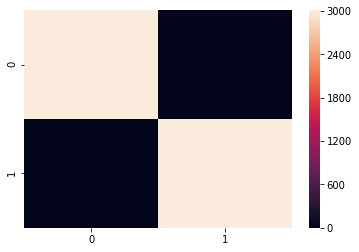

In [20]:
sns.heatmap(cm)